# 6.2 Exploring relationships

### This contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations incl. a Correlation Matrix Heatmap 
     Scatterplots
     Pair Plots
     Categorical Plots
#### 4. Hypothesis and future thoughts

### 1. Importing Visualization Libraries and Data

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#creating pathway for dataframes
path = os.path.join(r'/Users/katja/Documents/Airbnb/02 Data')

In [97]:
#import Airbnb Amsterdam csv
df = pd.read_csv(os.path.join(path, 'Prepared Data','2023_Amsterdam_Airbnb.csv'), index_col = False)

In [5]:
#loading garbage collector
import gc

### 2. Data cleaning & checking 

In [98]:
df.shape

(4847, 26)

In [99]:
df.columns

Index(['id', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'host_response_rate',
       'host_since', 'host_response_time', 'property_type',
       'property_accommodates', 'first_review', 'review_scores_location',
       'review_scores_communication', 'review_scores_rating', 'maximum_nights',
       'host_is_superhost', 'host_has_profile_pic'],
      dtype='object')

In [100]:
df.head()

id  host_id                          neighbourhood  latitude  longitude  \
0   2818     3159  Oostelijk Havengebied  Indische Buurt  52.36435    4.94358   
1  20168    59484                            CentrumOost  52.36407    4.89393   
2  27886    97647                            CentrumWest  52.38761    4.89188   
3  28871   124245                            CentrumWest  52.36775    4.89092   
4  29051   124245                            CentrumOost  52.36584    4.89111   

      room_type  price  minimum_nights  number_of_reviews last_review  ...  \
0  Private room   69.0               3                365  2023/11/27  ...   
1  Private room  117.0               1                366  2023/12/10  ...   
2  Private room  155.0               3                267  2023/11/19  ...   
3  Private room   79.0               2                569  2023/12/10  ...   
4  Private room   59.0               2                698  2023/12/08  ...   

   host_response_time                property_type  property_accommodates  \
0      within an hour        Private room in condo                      2   
1      within an hour    Private room in townhouse                      2   
2      within an hour    Private room in houseboat                      2   
3      within an hour  Private room in rental unit                      2   
4      within an hour  Private room in rental unit                      2   

   first_review  review_scores_location review_scores_communication  \
0    2009/03/30                    4.71                        4.98   
1    2010/03/02                    4.88                        4.61   
2    2012/01/09                    4.89                        4.92   
3    2010/08/22                    4.94                        4.93   
4    2011/03/16                    4.88                        4.92   

  review_scores_rating maximum_nights  host_is_superhost host_has_profile_pic  
0                 4.90             28                1.0                    1  
1                 4.44            365                0.0                    1  
2                 4.93            356                1.0                    1  
3                 4.87            730                1.0                    1  
4                 4.81            730                1.0                    1  

[5 rows x 26 columns]

In [101]:
# Rename columns whose names are too long

df.rename(columns = {'id': 'listing_id', 'calculated_host_listings_count': 'host_listings_count'},inplace = True)

In [102]:
#rearrange columns for better flow
df = df[['listing_id', 'host_id','host_listings_count', 'host_since', 'host_response_time','host_response_rate','host_is_superhost',
         'host_has_profile_pic','neighbourhood','latitude','longitude','property_type','room_type',
         'property_accommodates','price','minimum_nights','maximum_nights','availability_365','number_of_reviews','reviews_per_month','number_of_reviews_ltm',
         'first_review','last_review','review_scores_rating','review_scores_location','review_scores_communication']]

In [113]:
df.dtypes

listing_id                       int64
host_id                          int64
host_listings_count              int64
host_since                      object
host_response_time              object
host_response_rate               int64
host_is_superhost               object
host_has_profile_pic            object
neighbourhood                   object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
property_accommodates            int64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
availability_365                 int64
number_of_reviews                int64
reviews_per_month              float64
number_of_reviews_ltm            int64
first_review                    object
last_review                     object
review_scores_rating           float64
review_scores_location         float64
review_scores_communicati

In [110]:
df.head()

listing_id  host_id  host_listings_count  host_since host_response_time  \
0        2818     3159                    1  2008/09/24     within an hour   
1       20168    59484                    2  2009/12/02     within an hour   
2       27886    97647                    1  2010/03/23     within an hour   
3       28871   124245                    2  2010/05/13     within an hour   
4       29051   124245                    2  2010/05/13     within an hour   

   host_response_rate host_is_superhost host_has_profile_pic  \
0                 100         Superhost     Host Profile Pic   
1                 100   Not a Superhost     Host Profile Pic   
2                 100         Superhost     Host Profile Pic   
3                 100         Superhost     Host Profile Pic   
4                 100         Superhost     Host Profile Pic   

                           neighbourhood  latitude  ...  maximum_nights  \
0  Oostelijk Havengebied  Indische Buurt  52.36435  ...              28   
1                            CentrumOost  52.36407  ...             365   
2                            CentrumWest  52.38761  ...             356   
3                            CentrumWest  52.36775  ...             730   
4                            CentrumOost  52.36584  ...             730   

  availability_365 number_of_reviews  reviews_per_month  \
0                0               365               2.04   
1              168               366               2.18   
2              175               267               1.84   
3                0               569               3.51   
4               91               698               4.50   

   number_of_reviews_ltm  first_review  last_review  review_scores_rating  \
0                     51    2009/03/30   2023/11/27                  4.90   
1                     30    2010/03/02   2023/12/10                  4.44   
2                     24    2012/01/09   2023/11/19                  4.93   
3                    116    2010/08/22   2023/12/10                  4.87   
4                     97    2011/03/16   2023/12/08                  4.81   

   review_scores_location  review_scores_communication  
0                    4.71                         4.98  
1                    4.88                         4.61  
2                    4.89                         4.92  
3                    4.94                         4.93  
4                    4.88                         4.92  

[5 rows x 26 columns]

In [111]:
# update  from int to str
df ['host_is_superhost'] = df ['host_is_superhost'].astype('str', errors = 'ignore')

In [112]:
# update  from int to str
df ['host_has_profile_pic'] = df ['host_has_profile_pic'].astype('str', errors = 'ignore')

In [106]:
# update  from floa to int
df ['host_response_rate'] = df ['host_response_rate'].astype('int', errors = 'ignore')

In [72]:
df.describe()

listing_id       host_id  host_listings_count  host_response_rate  \
count  4.847000e+03  4.847000e+03          4847.000000         4847.000000   
mean   3.344711e+17  1.166809e+08             2.007840           94.173303   
std    4.118240e+17  1.492434e+08             2.961707           17.162742   
min    2.818000e+03  3.159000e+03             1.000000            0.000000   
25%    2.003106e+07  1.072081e+07             1.000000          100.000000   
50%    4.553979e+07  4.215263e+07             1.000000          100.000000   
75%    7.760544e+17  1.757649e+08             2.000000          100.000000   
max    1.034547e+18  5.484958e+08            22.000000          100.000000   

       host_has_profile_pic     latitude    longitude  property_accommodates  \
count           4847.000000  4847.000000  4847.000000            4847.000000   
mean               0.989065    52.366853     4.889668               2.812874   
std                0.104006     0.017384     0.035385               1.214957   
min                0.000000    52.290340     4.755870               1.000000   
25%                1.000000    52.356137     4.866260               2.000000   
50%                1.000000    52.366170     4.887950               2.000000   
75%                1.000000    52.376530     4.907475               4.000000   
max                1.000000    52.425159     5.026669              16.000000   

             price  minimum_nights  maximum_nights  availability_365  \
count  4847.000000     4847.000000     4847.000000       4847.000000   
mean    215.073860        3.536414      381.851042        105.150609   
std     103.503058        8.014835      455.240892        119.018009   
min      10.000000        1.000000        1.000000          0.000000   
25%     137.000000        2.000000       21.000000          5.000000   
50%     199.000000        2.000000       99.000000         52.000000   
75%     275.000000        3.000000     1001.000000        183.000000   
max     526.000000      195.000000     1125.000000        365.000000   

       number_of_reviews  reviews_per_month  number_of_reviews_ltm  \
count        4847.000000        4847.000000            4847.000000   
mean           67.708273           1.474351              16.840520   
std           139.901881           2.819927              38.651767   
min             1.000000           0.020000               0.000000   
25%             5.000000           0.380000               2.000000   
50%            14.000000           0.740000               5.000000   
75%            63.500000           1.755000              17.000000   
max          3528.000000         117.730000            1632.000000   

       review_scores_rating  review_scores_location  \
count           4847.000000             4847.000000   
mean               4.824916                4.798236   
std                0.263266                0.261427   
min                1.000000                1.000000   
25%                4.750000                4.700000   
50%                4.900000                4.870000   
75%                5.000000                5.000000   
max                5.000000                5.000000   

       review_scores_communication  
count                  4847.000000  
mean                      4.892205  
std                       0.231719  
min                       1.000000  
25%                       4.870000  
50%                       4.980000  
75%                       5.000000  
max                       5.000000

In [108]:
# update host is superhost and host has profile has profile pic to boolean 
vals_to_replace = {1 : "Superhost", 0 : "Not a Superhost"}

column_boo = ['host_is_superhost']

for column in column_boo: 
    df [column] = df[column].map(vals_to_replace)

In [109]:
# update host is superhost and host has profile has profile pic to boolean 
vals_to_replace = {1 : "Host Profile Pic", 0 : "No Profile Pic"}

column_boo = ['host_has_profile_pic']

for column in column_boo: 
    df [column] = df[column].map(vals_to_replace)

In [114]:
for col in df.columns.tolist():
    weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df[weird]) > 0:
        print (col)
# No mixed-type columns.

In [115]:
# Check for missing values
df.isnull().sum()

# No missing values!

listing_id                     0
host_id                        0
host_listings_count            0
host_since                     0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_has_profile_pic           0
neighbourhood                  0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
property_accommodates          0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_365               0
number_of_reviews              0
reviews_per_month              0
number_of_reviews_ltm          0
first_review                   0
last_review                    0
review_scores_rating           0
review_scores_location         0
review_scores_communication    0
dtype: int64

In [116]:
# Find duplicates
df_dups = df[df.duplicated()]

In [117]:
# No duplicates!
df_dups

Empty DataFrame
Columns: [listing_id, host_id, host_listings_count, host_since, host_response_time, host_response_rate, host_is_superhost, host_has_profile_pic, neighbourhood, latitude, longitude, property_type, room_type, property_accommodates, price, minimum_nights, maximum_nights, availability_365, number_of_reviews, reviews_per_month, number_of_reviews_ltm, first_review, last_review, review_scores_rating, review_scores_location, review_scores_communication]
Index: []

[0 rows x 26 columns]

## 3. Exploring Relationships

### Correlation Matrix Heatmap

In [133]:
df.columns

Index(['listing_id', 'host_id', 'host_listings_count', 'host_since',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'room_type', 'property_accommodates', 'price',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_location', 'review_scores_communication'],
      dtype='object')

In [120]:
sub = df[['price','property_accommodates','minimum_nights', 
          'maximum_nights', 'availability_365','number_of_reviews',
          'latitude','longitude']]

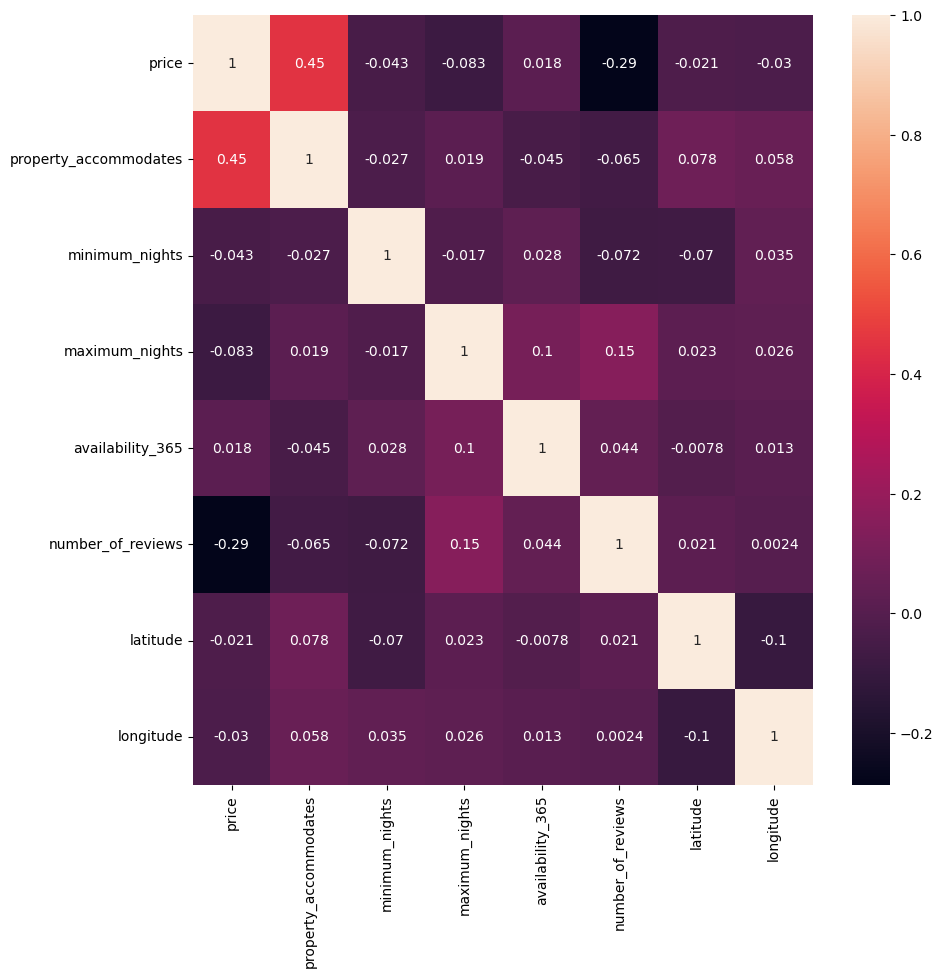

In [121]:
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

#### Discuss what the coefficients in the plot mean in terms of the relationships between the variables:

As explained in the preceding exercise, coefficients closer to 1 suggest a moderate relationship.

Upon examination, it is evident that the relationships between various variables are not as strong when compared to the 'price' and 'property_accommodates' variable. This disparity may stem from various factors; for instance, higher property prices may allow for a greater number of occupants in an Airbnb property, and vice versa. Conversely, lower property prices may restrict the number of people allowed to occupy the property.

Additionally, the correlation map reveals that, depending on the longitude, an increase in Airbnb property prices may occur. The relationship between these variables is characterized by a coefficient of 0.2, signifying a weak correlation. While this may not be an optimal scenario, a more in-depth analysis later in my report will shed light on the reasons behind this observation.

In [292]:
sub2 = df[['price','property_accommodates','minimum_nights', 
          'maximum_nights', 'availability_365','number_of_reviews','host_listings_count',
          'review_scores_location','host_response_rate','review_scores_communication']]

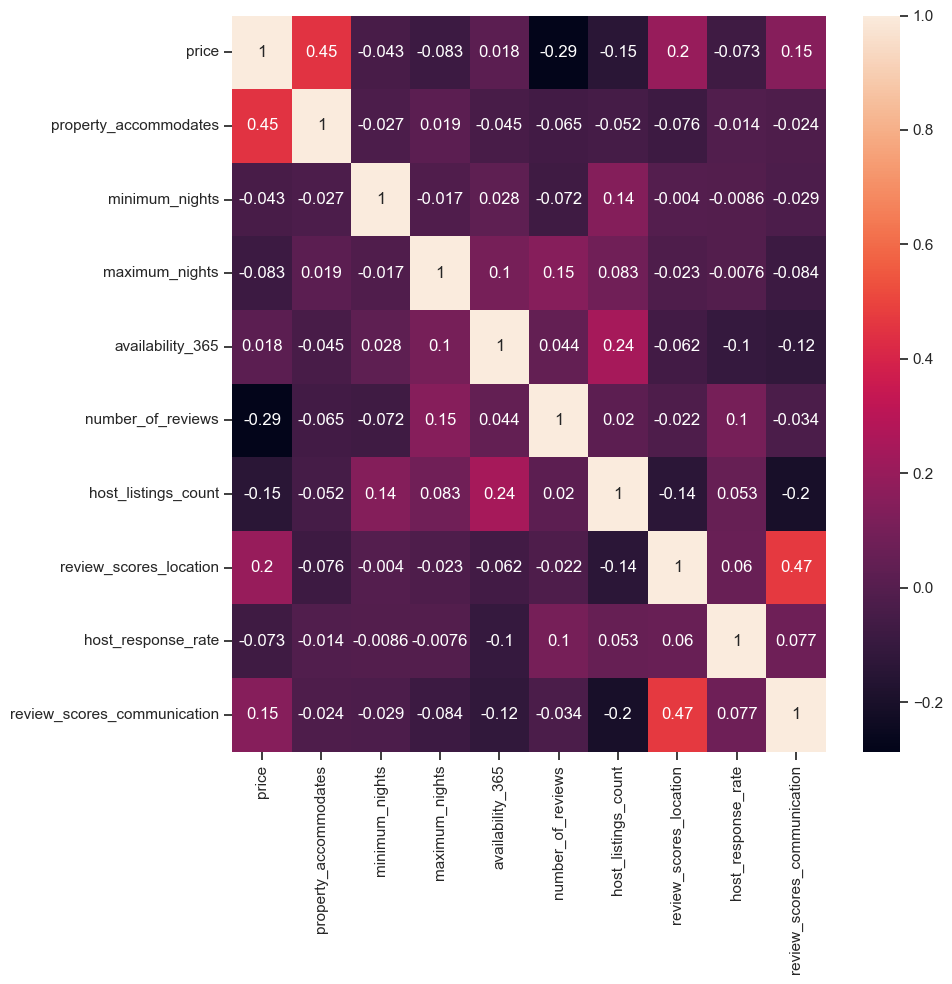

In [293]:
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub2.corr(), annot = True, ax = ax)

# Adjust the layout to ensure everything fits
plt.tight_layout()

Additionally,adding new variables to the heatmap reveals another strong correlation with 0.47 between host_response_rate and review_scores_location. We can assume that review of the location and the host response rate might be importing for the booking changes.

In [285]:
# export corr

corr.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/corr_matrix_heatmap.png'))

In [297]:
#delete to save space 

del sub2
del sub
del corr

gc.collect()

1417889

## Scatterplot

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


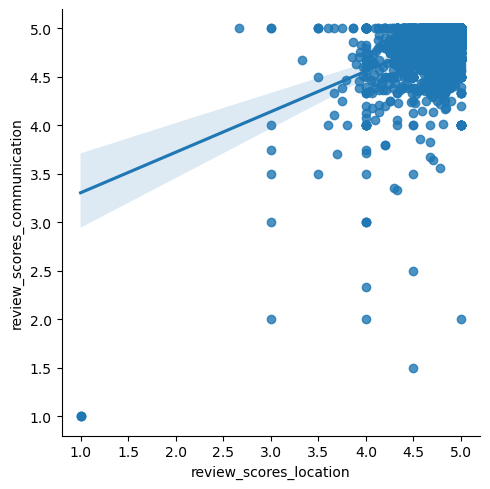

In [149]:
# Create a scatterplot for the "property_accommodates" and "price" columns in seaborn

scatter_price_prop = sns.lmplot(x = 'review_scores_location', y = 'review_scores_communication', data = df, palette='viridis')

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


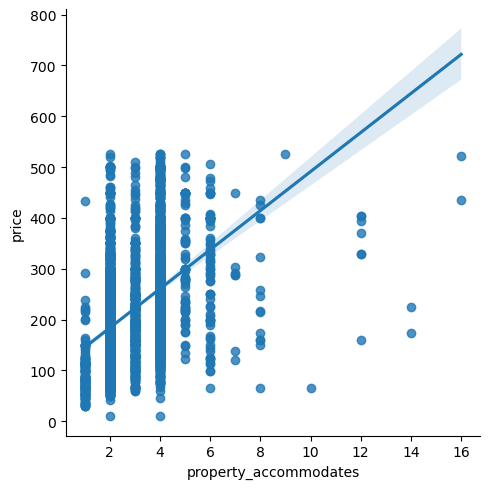

In [150]:
# Create a scatterplot for the "property_accommodates" and "price" columns in seaborn

scatter_price_prop = sns.lmplot(x = 'property_accommodates', y = 'price', data = df, palette='viridis')

The most substantial correlations emerged between the variables 'price' and 'property_accommodates,' with a coefficient of 0.45, and between 'host_response_rate' and 'review_scores_location,' with a coefficient of 0.47.

Although these results indicate a moderate relationship, when visualized in a scatterplot, it becomes evident that the trend is positive. This suggests, in the context of this analysis, that the variables in the dataset are affected by the price. Subsequent graphs in this exercise will further illustrate how the price of an Airbnb property can be influenced by its neighborhood.

In [281]:
# export scatter_price_prop_positive_corr
scatter_price_prop.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/scatter_price_prop_positive_corr.png'))

In [298]:
#delete df to save space 

del df_dups
del scatter_price_prop
del g
del sub_3

gc.collect()

81539

In [153]:
sub_3 = sub[['price','property_accommodates','availability_365', 'number_of_reviews']]

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

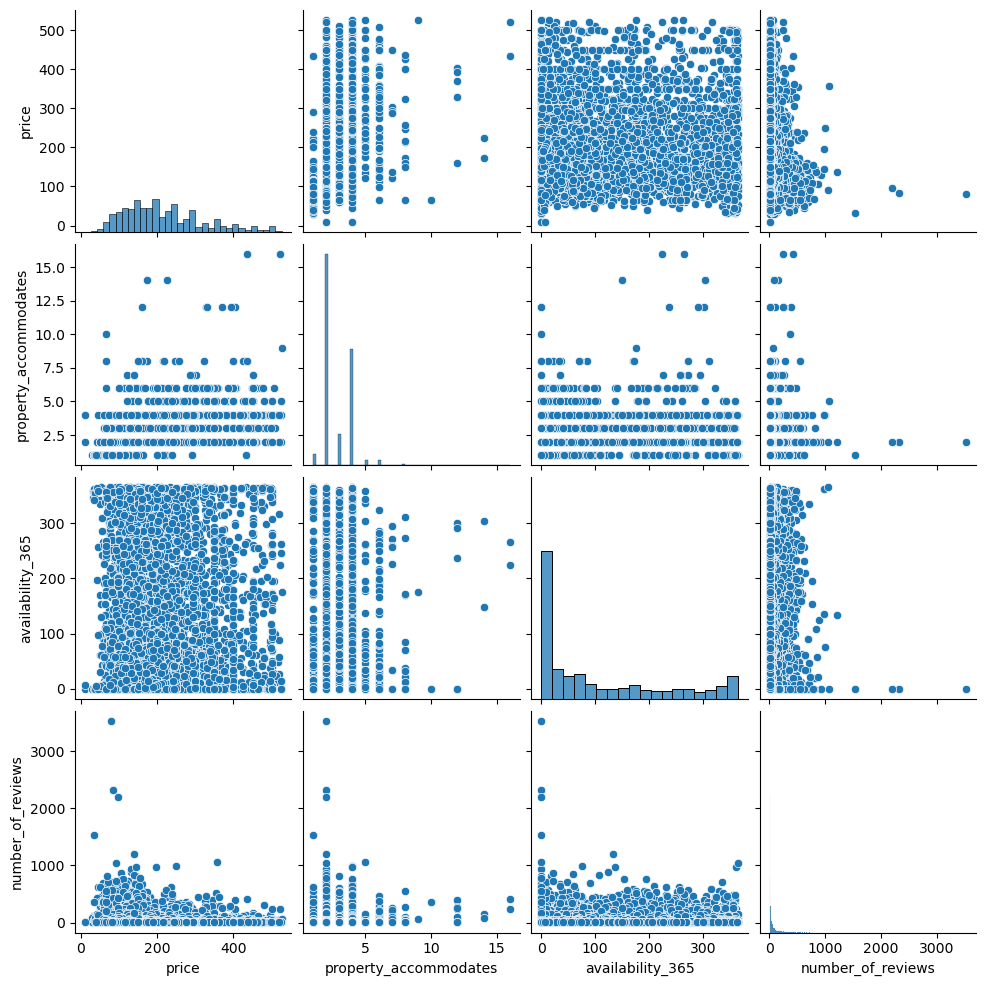

In [154]:
# Create a pair plot 

g = sns.pairplot(sub_3)

## Pair Plot entire dataset

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

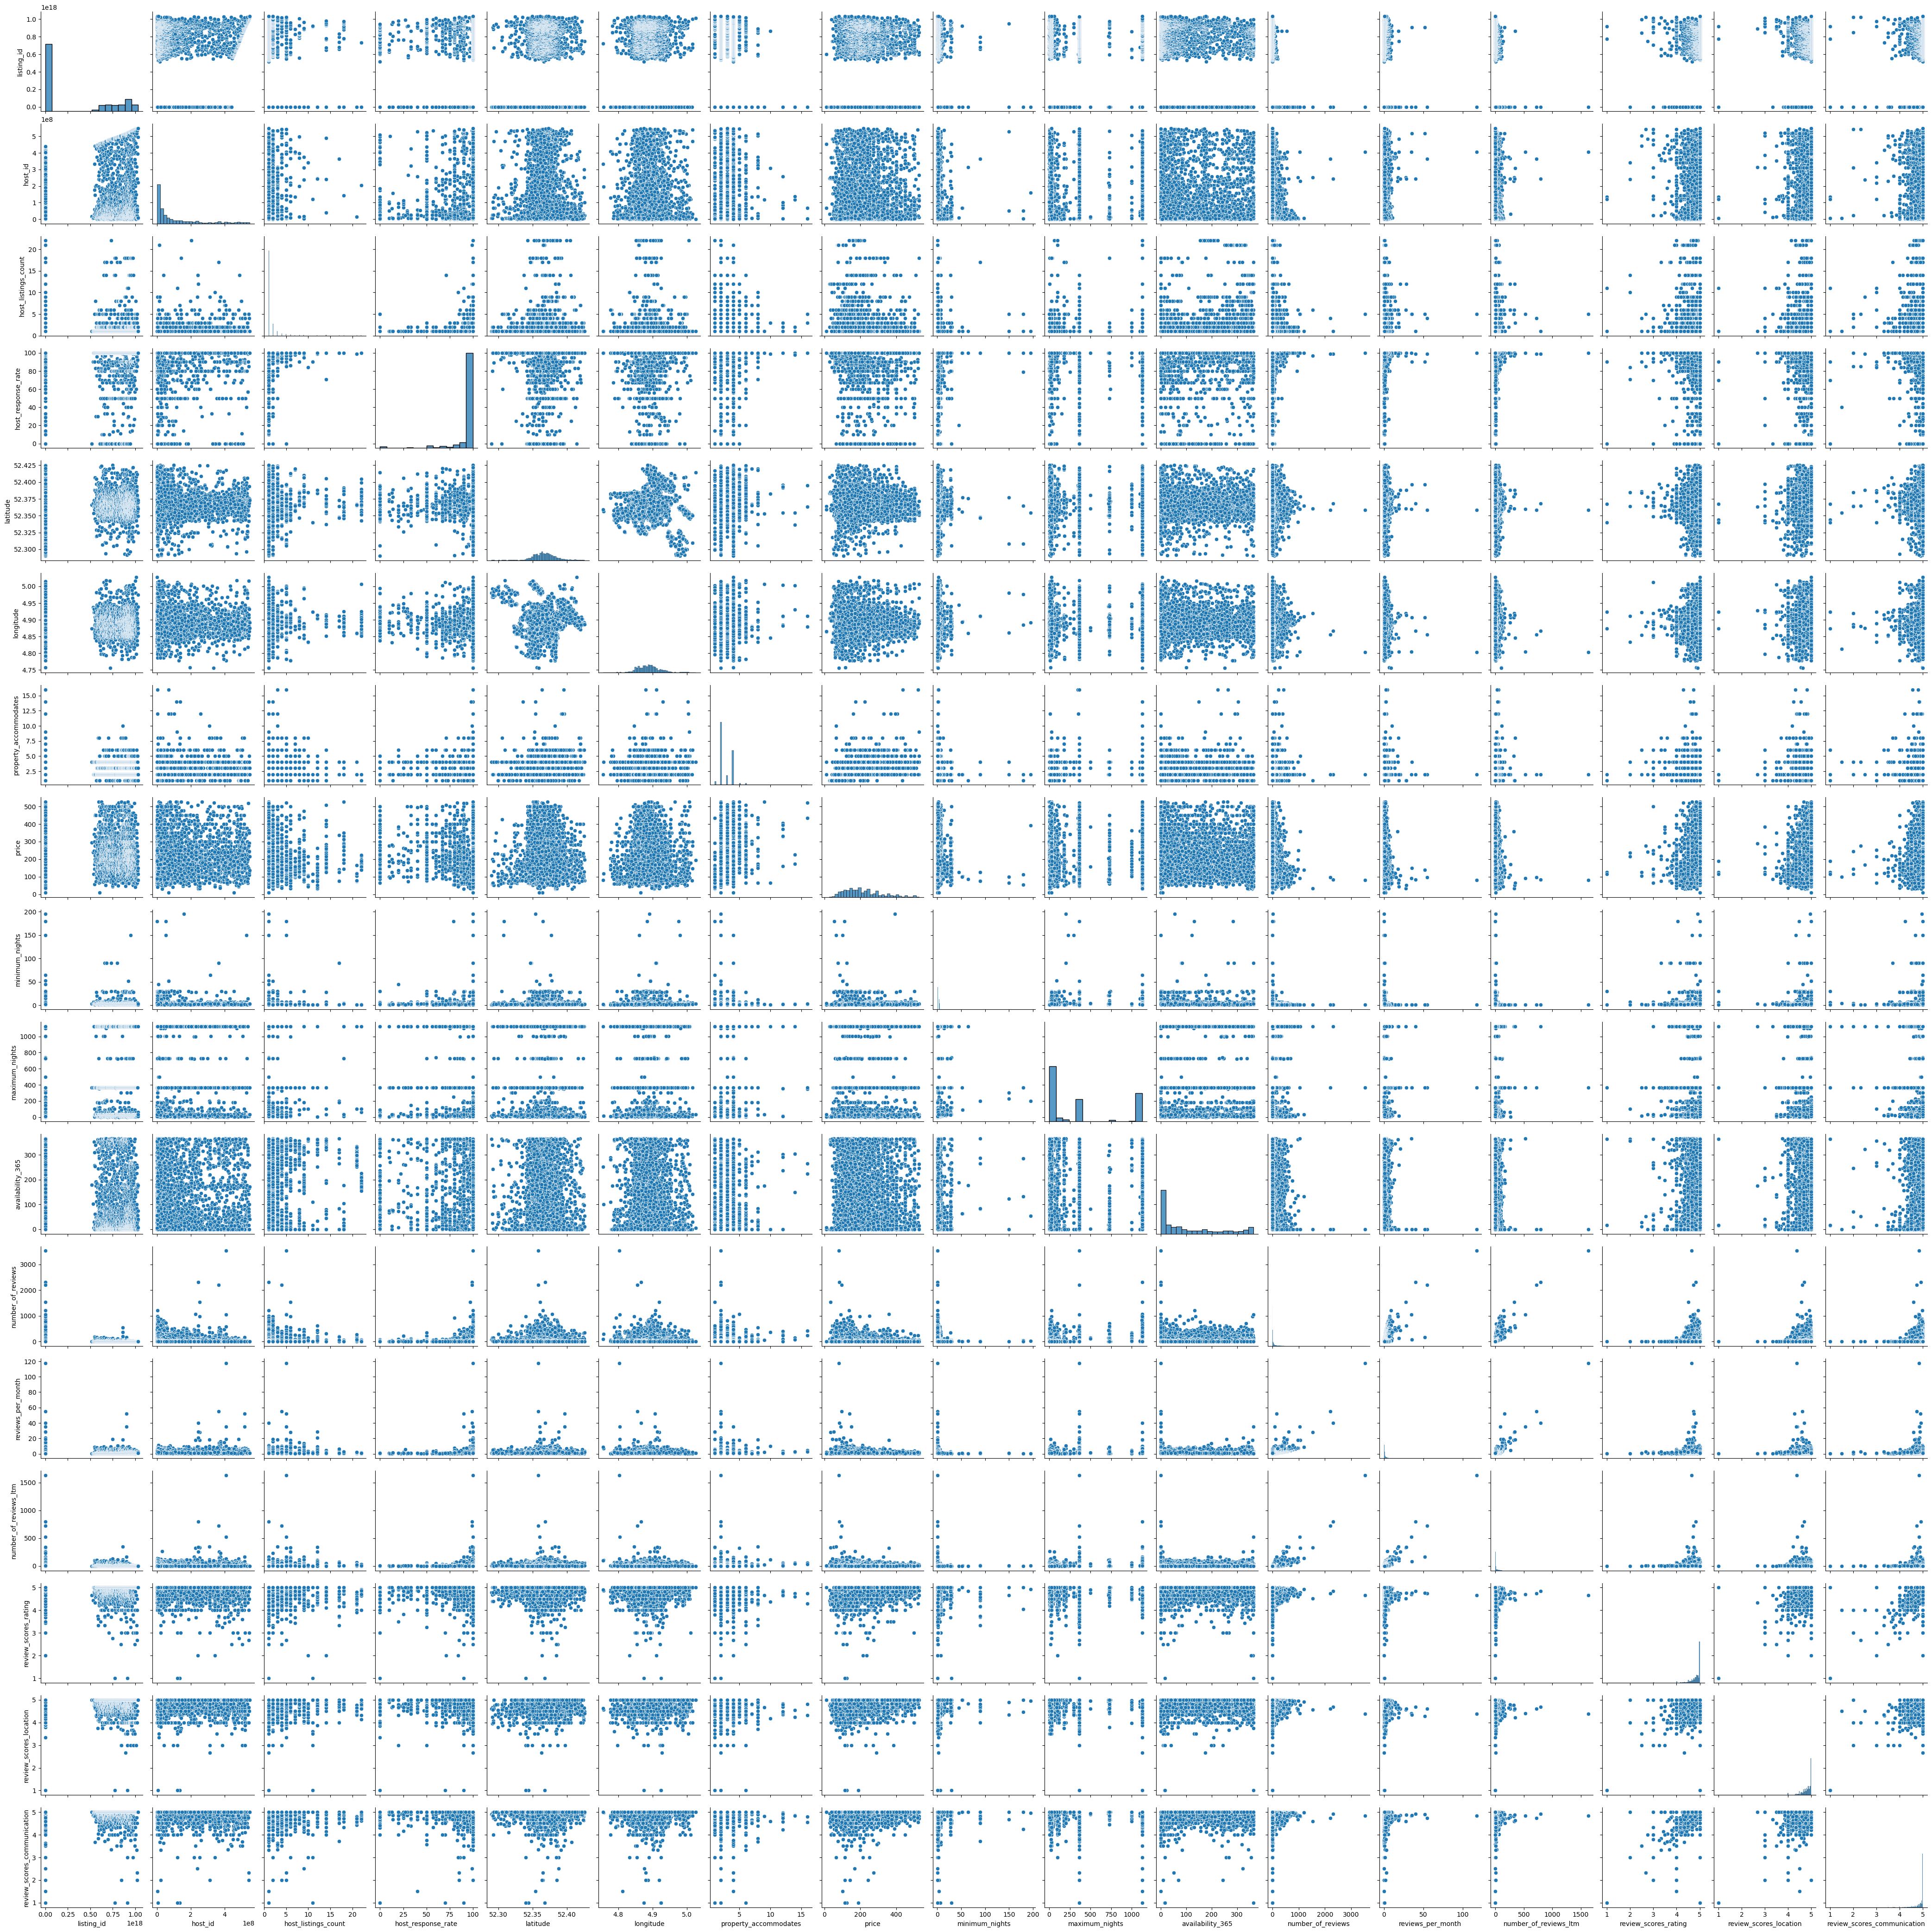

In [155]:
sns.pairplot(df, diag_kind="hist")

### Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why:

I aim to investigate the relationship between the variables: 
#### price & review_scores_rating

My objective is to determine whether a higher rating of an Airbnb host influences the persistence of the price.

Another set of variables I intend to delve into is 'number_of_reviews' and 'host_id.' 
My goal is to explore which neighborhood exhibits the highest rental frequency, thereby generating more host reviews. The scatterplot for these numeric variables provides an initial insight, and in subsequent exercises, I plan to explore the interaction of categorical variables with numeric ones.

## Categorical Plots

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Price Distribution')

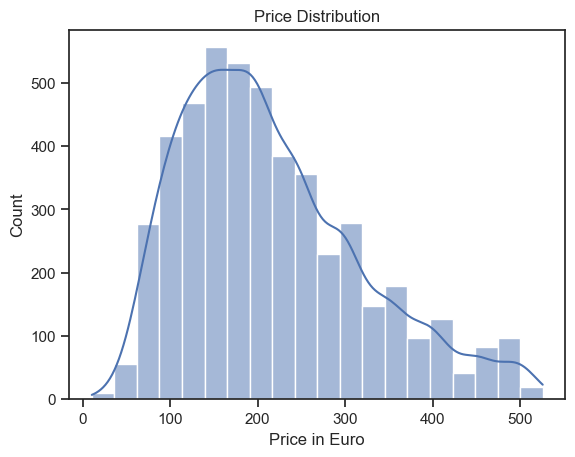

In [199]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

hist_price_distribution = sns.histplot(df['price'], bins = 20, kde = True)

# Add labels and a title
plt.xlabel('Price in Euro')
plt.ylabel('Count')
plt.title('Price Distribution')


The categorical plot above further suggests that individuals tend to rent Airbnb properties or rooms at a lower price, typically ranging from 200 Euro to 500 Euro per charge. However, it is important to note that external factors, such as whether this represents the price per night, per month, or for an event, cannot be conclusively determined. To enhance data reliability, I have adjusted the dataset to exclude outliers, specifically cases where the price was 10,000 Euro are a rare occurrence in the dataset.

At this point, I hypothesize that most properties are situated in the city center, particularly in the Centrum district of Amsterdam, which could contribute to higher prices. This is a preliminary assumption, subject to change with a more in-depth analysis of the dataset.

In [200]:
# export 
hist_price_distribution.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/hist_price_distribution.png'))

In [299]:
#delete df to save space 

del hist_price_distribution

gc.collect()

0

/var/folders/lt/8nbq3ckj63b31sc2gk8qbwvc0000gn/T/ipykernel_1124/2854883305.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  plot_price_neighbourhood = sns.stripplot(x='price', y='neighbourhood', data=df, jitter=True, dodge=True, palette='viridis')
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


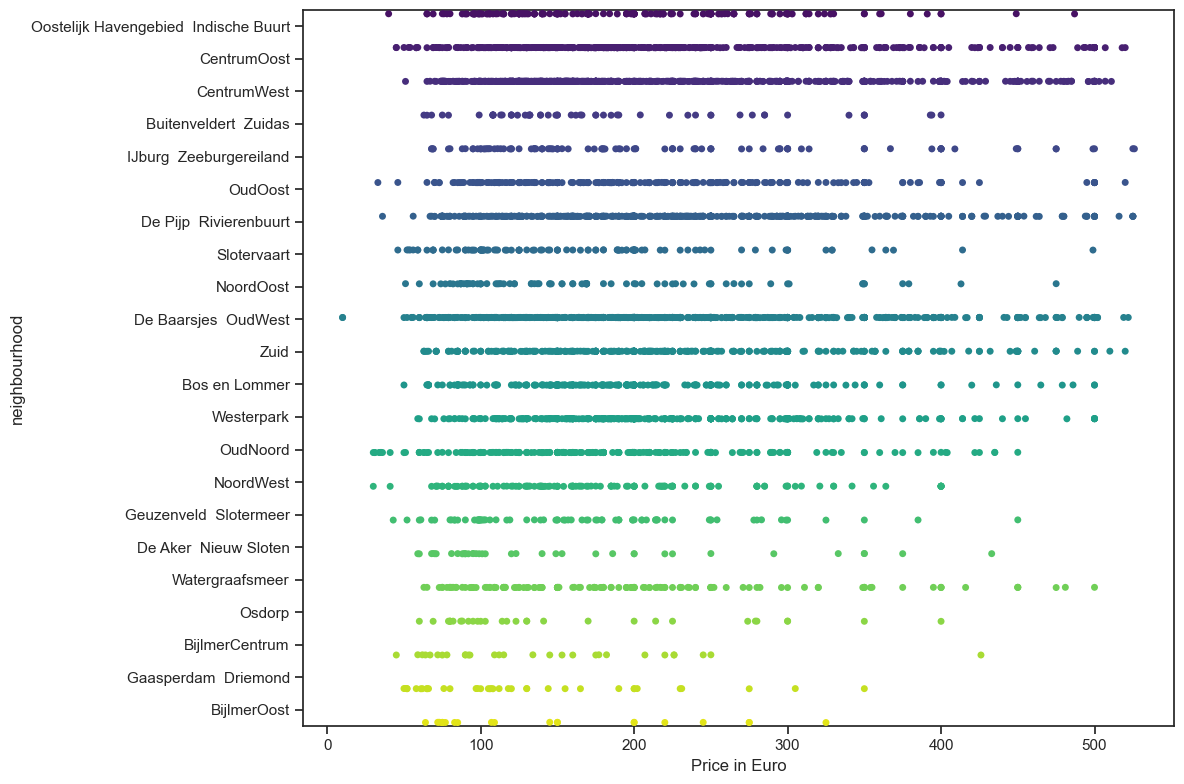

In [208]:
plt.figure(figsize=(12,8))
plot_price_neighbourhood = sns.stripplot(x='price', y='neighbourhood', data=df, jitter=True, dodge=True, palette='viridis')
# Add labels and a title
plt.xlabel('Price in Euro')


# Adjust the layout to ensure everything fits
plt.tight_layout()


I have incorporated a plot featuring the variables 'price' and 'neighbourhoods' to visualize the distribution across different neighborhoods. According to my hypothesis, the prices are higher in the Centrum of Amsterdam, while in BijlmerOost, located on the outskirts, the prices are lower due to a less widespread distribution.

/var/folders/lt/8nbq3ckj63b31sc2gk8qbwvc0000gn/T/ipykernel_1124/1545240146.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  plot_price_neighbourhood = sns.stripplot(x='host_listings_count', y='neighbourhood', data=df, jitter=True, dodge=True, palette='viridis')
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


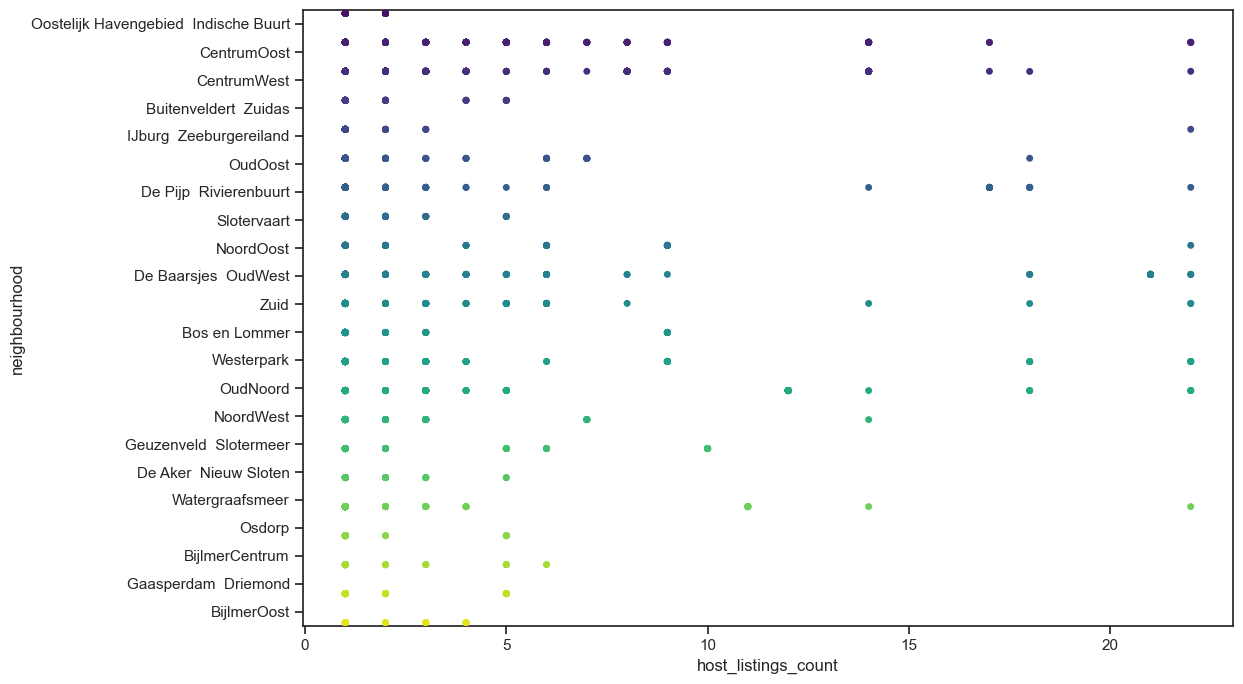

In [221]:
plt.figure(figsize=(12,8))
plot_price_neighbourhood = sns.stripplot(x='host_listings_count', y='neighbourhood', data=df, jitter=True, dodge=True, palette='viridis')

We can see that in the outskirt of Amsterdam a host has maxmimum 5-6 listing, where as in the Centrum one host can have above 20 listing. The majority hosts in the Centrum has from 1 up to 10 listings.

In [209]:
# export plot_price_neighbourhood
plot_price_neighbourhood.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/plot_price_neighbourhood.png'))

In [300]:
#delete df to save space 

del plot_price_neighbourhood

gc.collect()

44482

In [177]:
#setting up flag 'Airbnb Availability'

df.loc[df['availability_365'] >= 250, 'airbnb availability'] = 'All Year Availability'

In [178]:
df.loc[(df['availability_365'] >= 9) & (df['availability_365'] < 10), 'airbnb availability'] = 'Low Availability'

In [174]:
df.loc[df['availability_365'] >= 0, 'airbnb availability'] = 'No Availability'

In [179]:
df['airbnb availability'].value_counts(dropna = False)

airbnb availability
No Availability          3922
All Year Availability     866
Low Availability           59
Name: count, dtype: int64

In [188]:
#setting up flag for price as 'Price category'
#create price category 
df.loc[df['price'] < 100, 'price category'] = 'low price'
df.loc[(df['price'] >= 100) & (df['price'] < 300), 'price category'] = 'middle price'
df.loc[df['price'] >= 300, 'price category'] = 'high price'

In [189]:
df['price category'].value_counts(dropna = False)

price category
middle price    3332
high price       997
low price        518
Name: count, dtype: int64

In [183]:
df.columns

Index(['listing_id', 'host_id', 'host_listings_count', 'host_since',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'room_type', 'property_accommodates', 'price',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_location', 'review_scores_communication',
       'Airbnb Availability', 'airbnb availability', 'price category'],
      dtype='object')

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


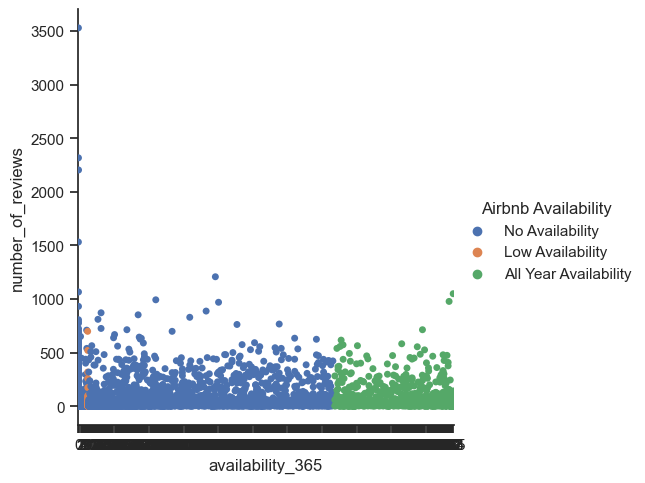

In [184]:
sns.set(style="ticks")
g = sns.catplot(x="availability_365", y="number_of_reviews", hue="Airbnb Availability", data=df)

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


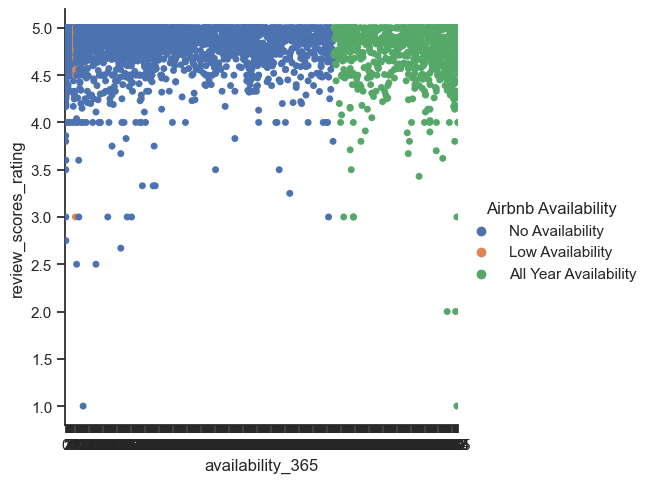

In [185]:
sns.set(style="ticks")
g = sns.catplot(x="availability_365", y="review_scores_rating", hue="Airbnb Availability", data=df)

Utilizing the categorical plot, I introduced a category labeled 'All Year/No/Low Availability' to assess whether availability throughout the year influences the number of reviews. However, based on the chart, there is no distinct and indicative result.

In [302]:
#delete df to save space 

del g_catplot_price_accommodates
del cwd

gc.collect()

5553

## Are there any noteable features, here accomodates, that effect the price?

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


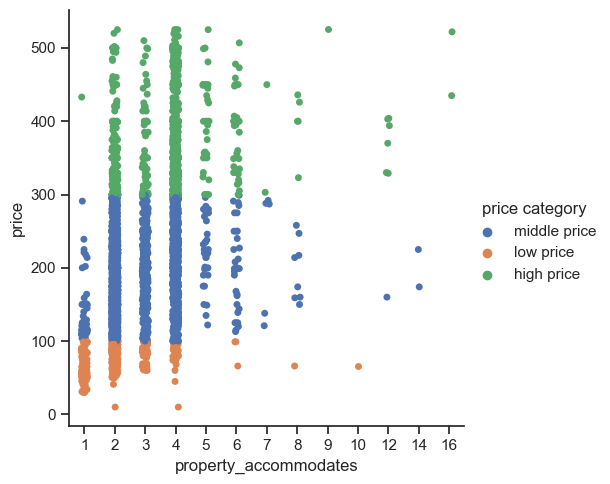

In [192]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g_catplot_price_accommodates = sns.catplot(x="property_accommodates", y="price", hue="price category", data=df)

Properties for accommodates for 2-4 have the most dense distribution of all price categories. As the number of accommodates increase the distribution is very low and only offers properties in the middle till high price category.The most dense distribution for the low price category is for offers for 1 accommodates.

In [193]:
# export g_catplot_price_accommodates 
g_catplot_price_accommodates.savefig("catplot_price_accommodates.png")

In [194]:
#current dir
cwd = os.getcwd()
cwd

'/Users/katja/Documents/Airbnb/03 Scripts'

## Do reviews effect the listing price?

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


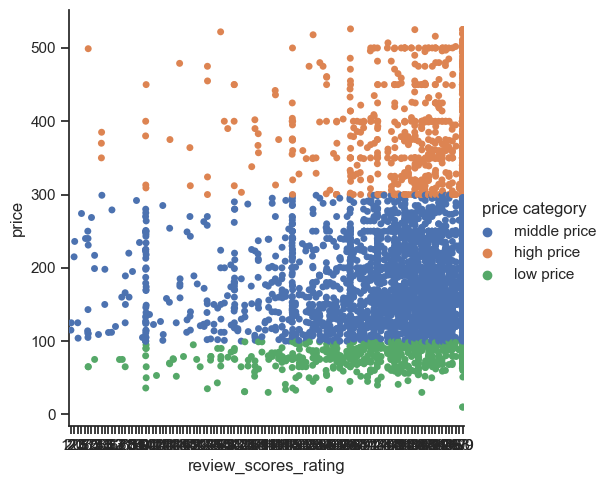

In [191]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="review_scores_rating", y="price", hue="price category", data=df)

Using the categorical plot, I introduced a category labeled 'price category' to thoroughly examine how the price throughout the year impacts the number of reviews or ratings in relation to the number of accommodates.

The analysis reveals that properties with a moderate price range have a greater likelihood of receiving higher ratings. The price category appears to be less significant for low ratings. In summary, the reviews do not appear to have a substantial effect on the overall pricing.

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


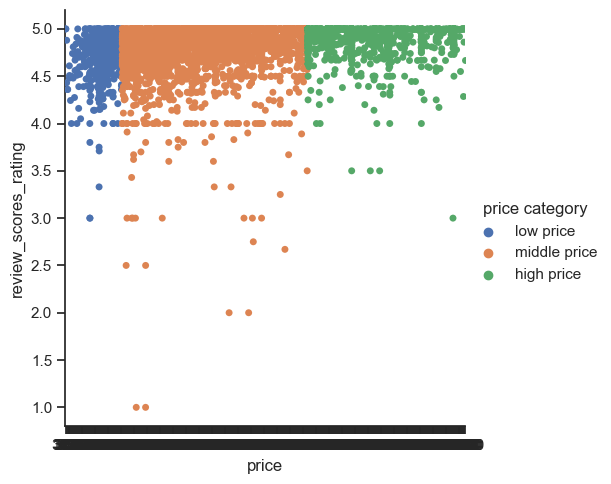

In [279]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="price", y="review_scores_rating", hue="price category", data=df)

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


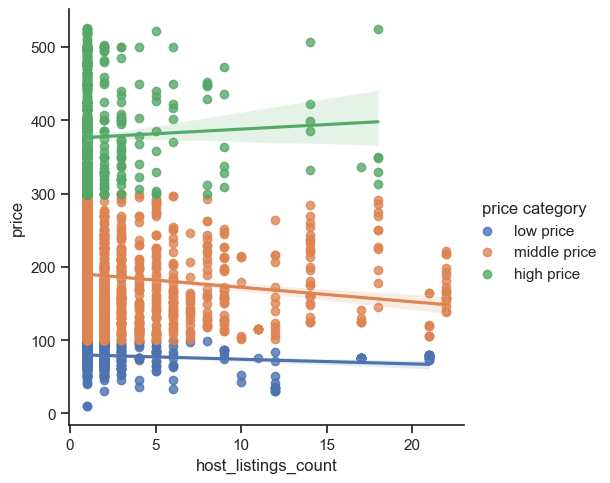

In [219]:
#review scores value & rating

sns.lmplot(x = 'host_listings_count', y = 'price',hue="price category", data = df)

## Does an room type impcat  Airbnb property prices/ offers?

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/lt/8nbq3ckj63b31sc2gk8qbwvc0000gn/T/ipykernel_1124/2945582273.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


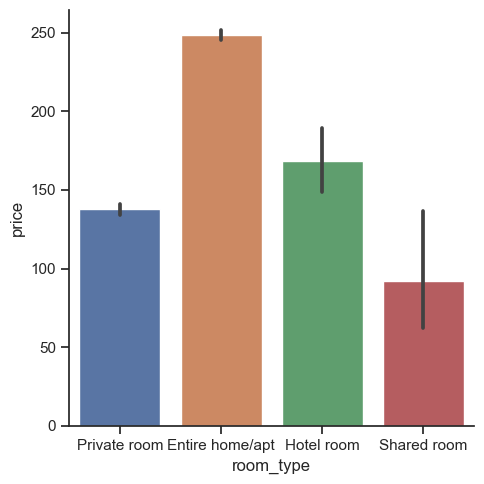

In [224]:
room_type_price_catplot = sns.catplot(x ='room_type', y ='price', data = df, kind ='bar')

# Adjust the layout to ensure everything fits
plt.tight_layout()

Entire homes/ appartments have the highest price range and most likley are the most booked, followed by Hotel rooms. Shared rooms seem to be the chapest option to book amongst all room types. 

In [225]:
# export plot_price_neighbourhood
room_type_price_catplot.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/room_type_price_catplot.png'))

In [303]:
#delete df to save space 

del room_type_price_catplot

gc.collect()

3042

## Which room type is most popular?

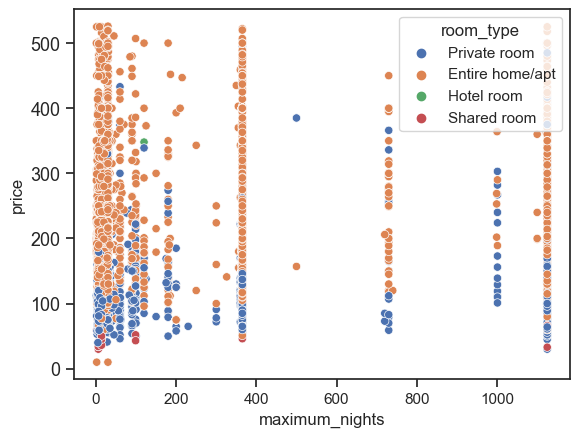

In [277]:
popular_room_type = sns.scatterplot(x = 'maximum_nights', y = 'price', hue = 'room_type', data = df)

The chart aboves indicates that the majority of people book entire home/ appartments rather than a shared room or hotel room. There is overall no big change in this scenario including the maxium amount of nights/stays.

In [278]:
# export popular_room_type
popular_room_type.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/popular_room_type.png'))

In [304]:
#delete df to save space 

del popular_room_type

gc.collect()

3694

### Which Neighbourhood in Amsterdam has the highest Airbnb prices?

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/lt/8nbq3ckj63b31sc2gk8qbwvc0000gn/T/ipykernel_1124/3735799483.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


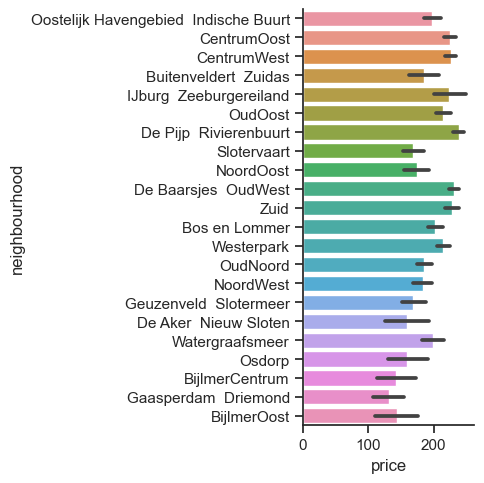

In [227]:
neighbourhood_price_catplot = sns.catplot(x ='price', y ='neighbourhood', data = df, kind ='bar')

# Adjust the layout to ensure everything fits
plt.tight_layout()

The top 5 neighbourhoods with highest price are De Baarsjes-Oud West, De Pijp- Rivierenbuurt, Zuid, Centrum West and Centrum Oost. 

In [276]:
# export neighbourhood_price_catplot
neighbourhood_price_catplot.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/neighbourhood_price_catplot.png'))

In [305]:
#delete df to save space 

del neighbourhood_price_catplot

gc.collect()

6506

## Which rental property types are available and are the most booked?

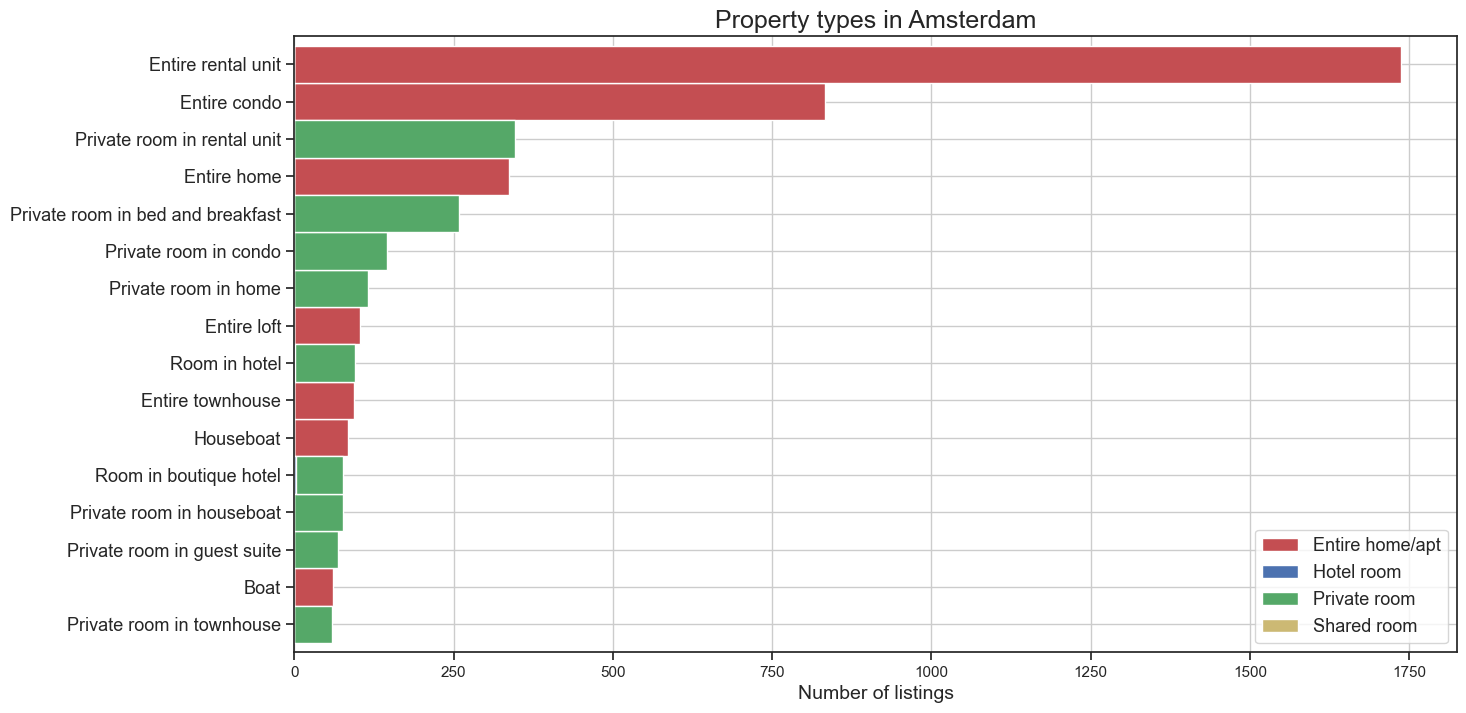

In [274]:
prop = df.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=50]
prop = prop.drop(columns=['total'])

property_types_amsterdam = prop.plot(kind='barh',stacked=True, color = ["r","b","g","y"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Amsterdam', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

Many of those property types have very few listings in Amsterdam. In the figure below, I am only displaying property types with at least 50 listings. As we can see, the vast majority of the properties in Amsterdam are Entire rental home units followed by Entire condo.

In [275]:
# export property_types_amsterdam
property_types_amsterdam.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/property_types_amsterdam.png'))

In [306]:
#delete df to save space 

del property_types_amsterdam

gc.collect()

7536

In [240]:
df.property_type.unique()

array(['Private room in condo', 'Private room in townhouse',
       'Private room in houseboat', 'Private room in rental unit',
       'Entire rental unit', 'Entire guest suite', 'Entire condo',
       'Private room in bed and breakfast', 'Entire loft',
       'Private room in boat', 'Entire townhouse', 'Entire home',
       'Private room in loft', 'Private room in home', 'Boat',
       'Private room in guest suite', 'Private room in farm stay',
       'Room in bed and breakfast', 'Houseboat',
       'Private room in guesthouse', 'Private room', 'Entire guesthouse',
       'Private room in earthen home', 'Room in boutique hotel',
       'Entire serviced apartment', 'Private room in villa',
       'Private room in tiny home', 'Private room in bungalow',
       'Shared room in condo', 'Entire cabin', 'Room in hotel',
       'Entire place', 'Private room in serviced apartment',
       'Entire villa', 'Shared room in home', 'Private room in cabin',
       'Entire cottage', 'Private room in

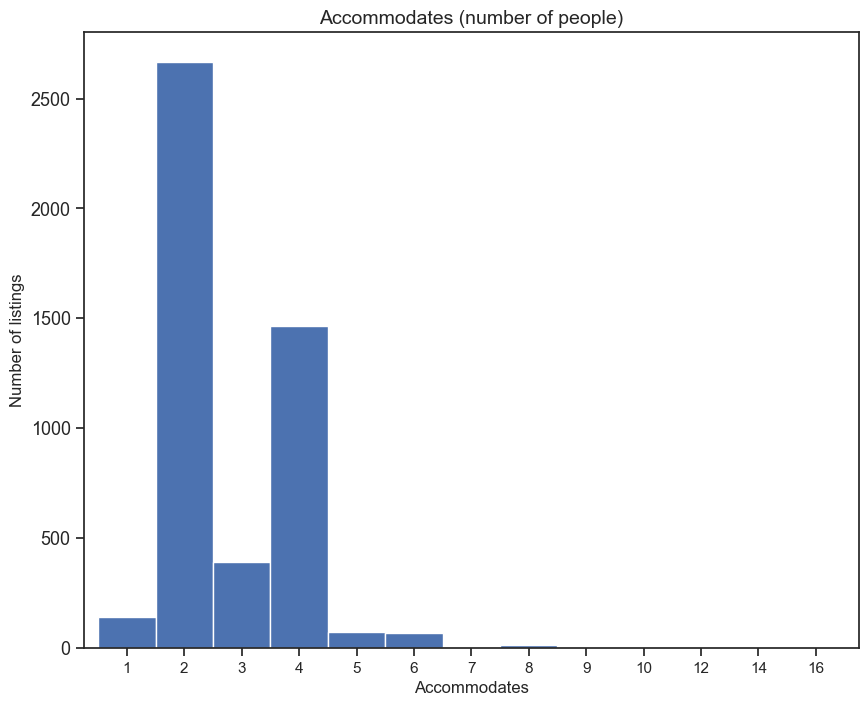

In [272]:
feq=df['property_accommodates'].value_counts().sort_index()
accommodates_amount_listings = feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=14)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

As expected, the majority of listings are designed for 2 people, and Airbnb sets a maximum limit of 16 guests per listing.

Nevertheless, an interesting observation pertains to Amsterdam's regulations concerning accommodations. To address fire hazard concerns and potential noise issues from larger groups, property owners are permitted to rent their properties to groups with a maximum of 4 people. Consequently, listings indicating a maximum capacity above 4 are not in compliance with these regulations.

In [273]:
# export accommodates_amount_listings
accommodates_amount_listings.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/accommodates_amount_listings.png'))

In [307]:
#delete df to save space 

del accommodates_amount_listings

gc.collect()

3894

## How is the distribution of Airbnb listings accross different neighbourhoods in Amsterdam?

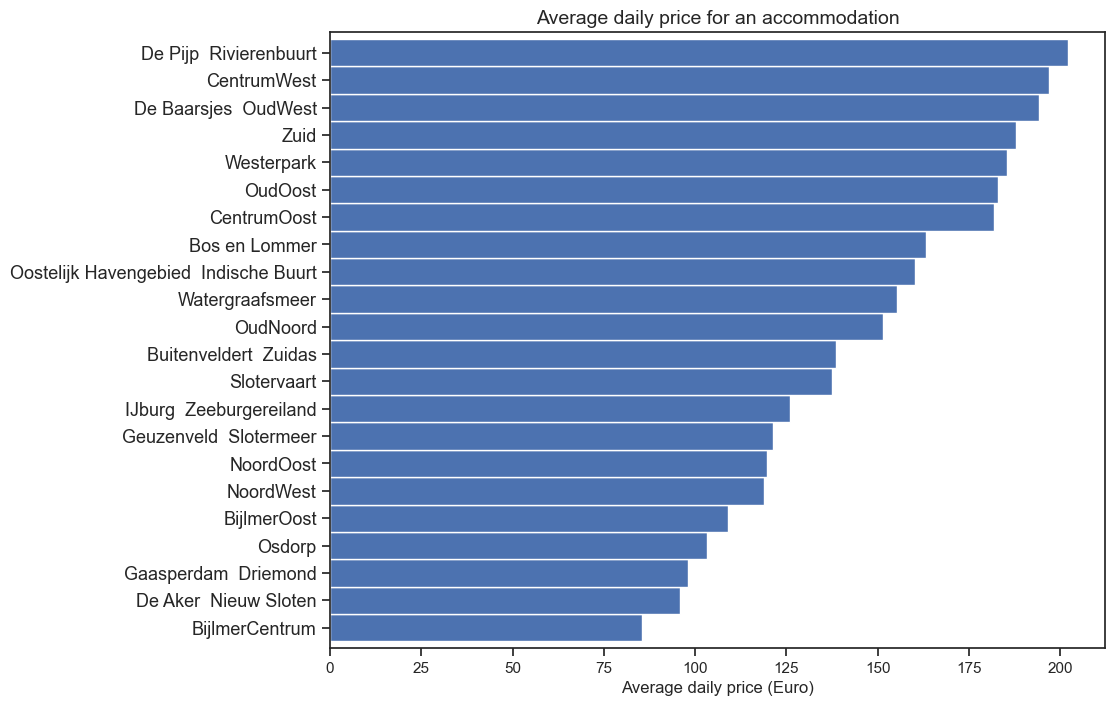

In [270]:

average_price_neighbourhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
average_price_all_neighbourhood = feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for an accommodation", fontsize=14)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

In [271]:
# export average_price_all_neighbourhood
average_price_all_neighbourhood.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/average_price_all_neighbourhood.png'))

In [308]:
#delete df to save space 

del average_price_all_neighbourhood

gc.collect()

5445

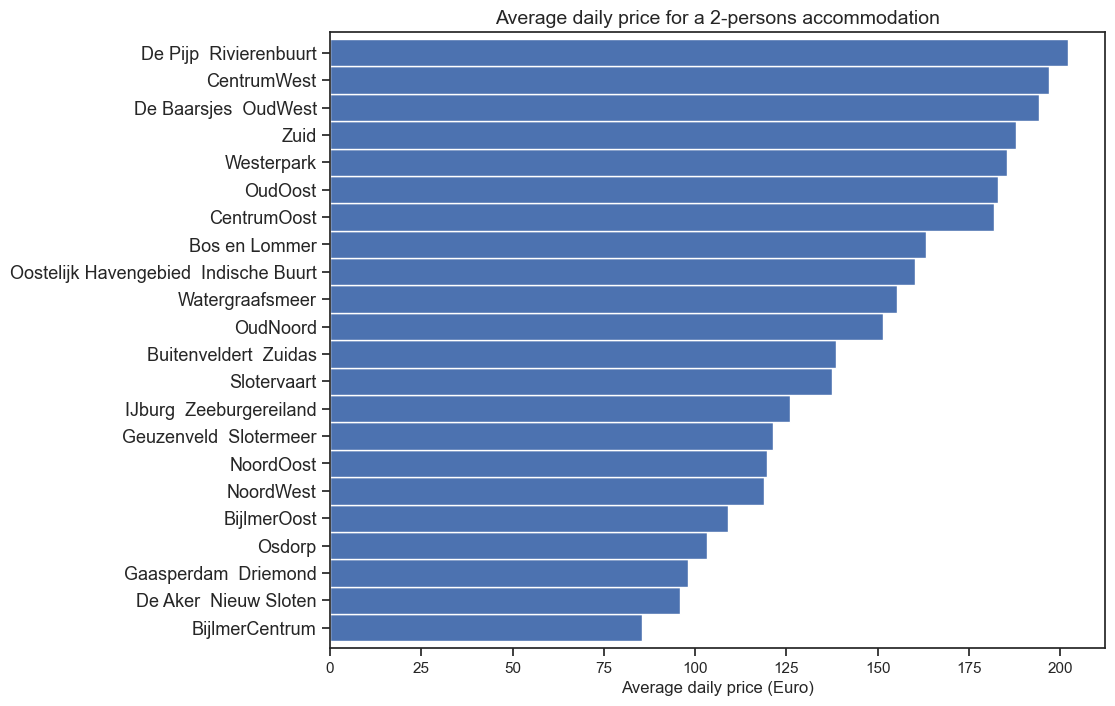

In [268]:
feq = df[df['property_accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)

average_price_2_accommodation = feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=14)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

In [269]:
# export average_price_2_accommodation
average_price_2_accommodation.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/average_price_2_accommodation.png'))

In [309]:
#delete df to save space 

del average_price_2_accommodation

gc.collect()

5445

## Does the host response time effect the booking?

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/lt/8nbq3ckj63b31sc2gk8qbwvc0000gn/T/ipykernel_1124/1304350837.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


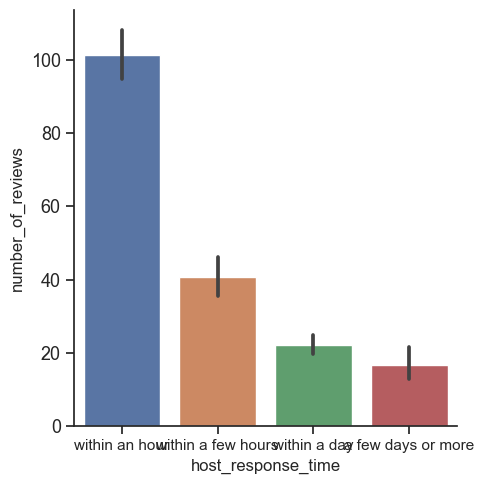

In [264]:
respone_time_booking = sns.catplot(x ='host_response_time', y ='number_of_reviews', data = df, kind ='bar')

# Adjust the layout to ensure everything fits
plt.tight_layout()

We can assume that the response time of within an hour, affects the booking, increase the change for a booking and to receive a review later one. A later reply drastically lowers the change of receiving an review, assuming also to affect the booking by lower bookings.

In [265]:
# export respone_time_booking
respone_time_booking.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/respone_time_booking.png'))

In [310]:
#delete df to save space 

del respone_time_booking

gc.collect()

3042

## Does booking a property from a Superhost influences the price of the property?

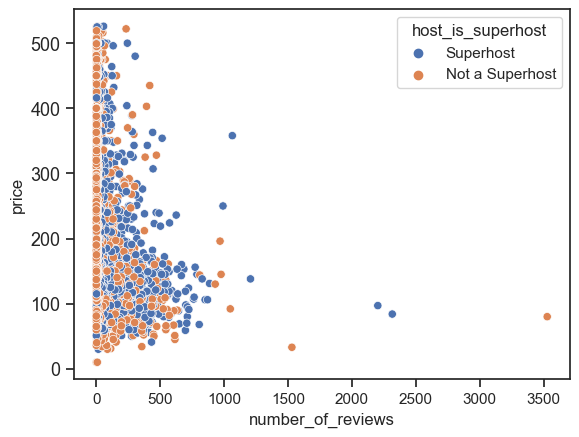

In [262]:
scatter_superhost_price = sns.scatterplot(x = 'number_of_reviews', y = 'price', hue = 'host_is_superhost', data = df)

There seems to be no correlation of a booking a property for higher price when booking from a Superhost. Overall it seems that a Superhost gets more reviews, meaning also more bookings compare to a host that is not a Superhost but which are not influenced by the price of the property.

In [263]:
# export scatter_superhost_price
scatter_superhost_price.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/scatter_superhost_price.png'))

In [311]:
#delete df to save space 

del scatter_superhost_price

gc.collect()

3532

/var/folders/lt/8nbq3ckj63b31sc2gk8qbwvc0000gn/T/ipykernel_1124/3618482493.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  plot_neighbourhood_popularity = sns.stripplot(x='number_of_reviews', y='neighbourhood', data=df, jitter=True, dodge=True, palette='viridis')
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


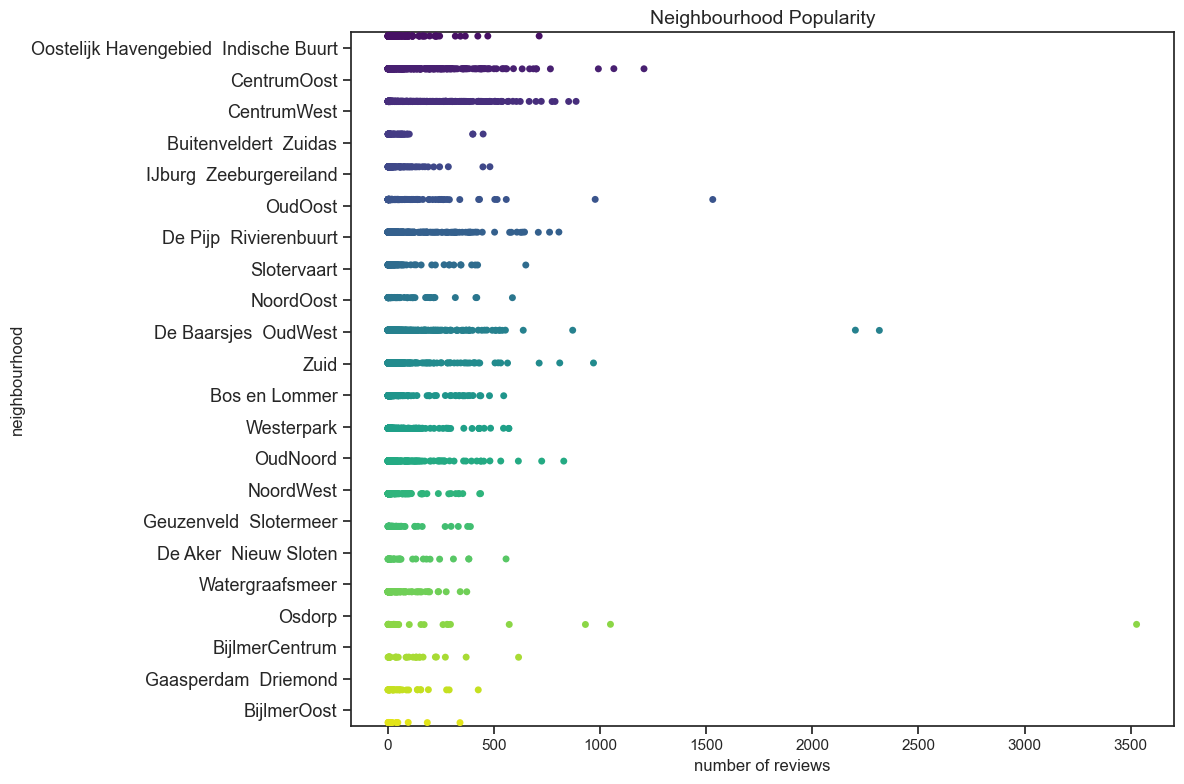

In [260]:
plt.figure(figsize=(12,8))
plot_neighbourhood_popularity = sns.stripplot(x='number_of_reviews', y='neighbourhood', data=df, jitter=True, dodge=True, palette='viridis')
# Add labels and a title
plt.xlabel('number of reviews')
plt.title("Neighbourhood Popularity", fontsize=14)

# Adjust the layout to ensure everything fits
plt.tight_layout()

If look at the number of reviews in each neighbourhood and equal the number of reviews to the amount of bookings, 'De Baarsjes - Oud West' neighbourghood seems to be amongst the most popular neighbourhood and Bijlmer Osst the least popular neighbourhood, which follows the previous findings.

In [261]:
# export plot_neighbourhood_popularity
plot_neighbourhood_popularity.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/plot_neighbourhood_popularity.png'))

In [312]:
#delete df to save space 

del plot_neighbourhood_popularity

gc.collect()

44483

## Does providing a host profile picture affect (future) bookings?

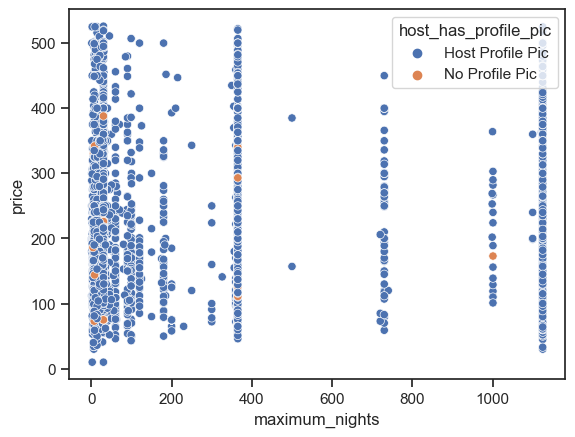

In [286]:
pic_booking = sns.scatterplot(x = 'maximum_nights', y = 'price', hue = 'host_has_profile_pic', data = df)

It appears that Airbnb properties/accommodations with host profile pictures tend to attract more bookings. I posit that the inclusion of a profile picture fosters trust and plays a crucial role in the decision-making process when choosing whether to book an accommodation.

In [287]:
# export pic_booking
pic_booking.figure.savefig(os.path.join(r'/Users/katja/Documents/Airbnb/04 Analysis/Visualizations/pic_booking_scatterplot_trust.png'))

In [313]:
#delete df to save space 

del pic_booking

gc.collect()

3350

### The question that I generated in the previous task being answered above.

I aim to delve deeper into the price by calculating the average price score and examining its correlation with the location or neighborhood. Additionally, I plan to compare these findings with the neighborhoods associated with the average price of accommodations designed for two people. Furthermore, I also would to follow up in conducting a more detailed analysis of the various review scores.

### Hypothesis: The neighborhood in which an Airbnb property is located significantly influences its average price meaning a more popular neighbourhood with higher listing has a higher average price. 

### Null Hypothesis (H0): The neighborhood does not significantly impact the average price of Airbnb listings in Amsterdam.

### Alternative Hypothesis (H1): The neighborhood has a statistically significant effect on the average price of Airbnb listings in Amsterdam.

#### Rationale:
This hypothesis is grounded in the assumption that different neighborhoods in Amsterdam may offer varying levels of amenities, proximity to attractions, and overall desirability. These factors can contribute to differences in demand and subsequently influence pricing.

#### Expectation:
I expect that properties in popular or centrally located neighborhoods will have higher average prices compared to those in less central or tourist-centric areas. Desirable neighborhoods may attract more guests, leading to increased demand and higher prices.

#### Potential Insights:
If the hypothesis is supported, it could provide valuable insights for both hosts and guests. Hosts could better understand the pricing dynamics of different neighborhoods, helping them optimize their pricing strategies. For guests, this information could assist in making informed decisions based on their preferences for location and budget constraints.

In [295]:
## Export Dataset incl. the new columns 'price category'& 'airbnb availability'

df.to_csv(os.path.join(path,'Prepared Data', '2023_Amsterdam_Airbnb_Data_updated.csv'), index=False)

In [296]:
#exporting file to PKL 
df.to_pickle(os.path.join(path,'Prepared Data', '2023_amsterdam_airbnb_data_updated.pkl'))

In [314]:
#delete df to save space 

del df

gc.collect()

0